In [0]:
# Import dataset from kaggle
# Create at least 1 visualization of the data using the seaborn library of your choice.
# Build a logistic regression model using Scikit-learn to predict fraudulent transactions
# Train it on this kaggle dataset.

In [0]:
#from google.colab import files
#uploaded = files.upload()



In [2]:
!pip install pandas==0.19.2 scikit-learn==0.19.1

In [7]:
import pandas as pd
# import seaborn  
import seaborn as sns
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,120923.0,0.127701,-4.296441,-0.732761,0.635049,-2.779624,0.129155,-0.257344,-0.092168,0.748601,...,0.477364,-0.221812,-0.573745,-0.021396,-0.882588,-0.367338,-0.090857,0.152328,1000.00,0
1,2477.0,-0.948254,0.670696,1.587277,-0.370367,1.014559,2.139724,0.783217,0.174344,0.182375,...,-0.109719,0.319397,-0.172713,-1.308874,-0.411183,0.277208,-0.310521,-0.322267,47.83,0
2,129822.0,-0.339123,1.296067,-0.708733,-0.682308,0.956288,-0.785738,0.915017,-0.068403,0.373271,...,-0.419735,-0.929357,0.107899,0.358938,-0.288065,0.135618,0.427882,0.222902,4.49,0
3,68305.0,1.245202,0.315351,0.293774,0.700937,-0.403487,-1.078306,0.074417,-0.188719,0.076055,...,-0.287544,-0.856780,0.127925,0.337660,0.204122,0.094782,-0.026045,0.031177,7.41,0
4,82286.0,0.741396,-1.146118,0.756830,0.179581,-1.015156,0.669155,-0.571144,0.315230,0.963466,...,-0.050309,-0.370284,-0.126824,-0.214844,-0.005379,0.952805,-0.062322,0.033848,219.20,0


In [8]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(frauds))
print(len(non_frauds))

492
284315


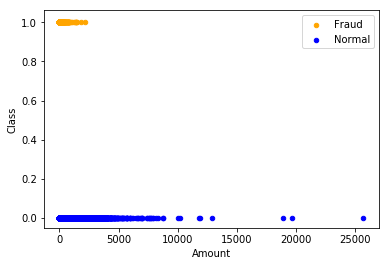

In [9]:
ax = frauds.plot.scatter(x='Amount',y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount',y='Class', color='Blue', label='Normal', ax=ax)

plt.show()

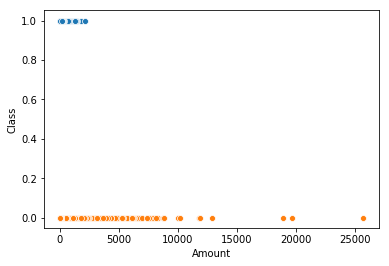

In [6]:
#sds = sns.load_dataset("tips")
ax = sns.scatterplot(x="Amount", y="Class", data=frauds)
sns.scatterplot(x="Amount", y="Class", data=non_frauds)


KeyboardInterrupt: ignored

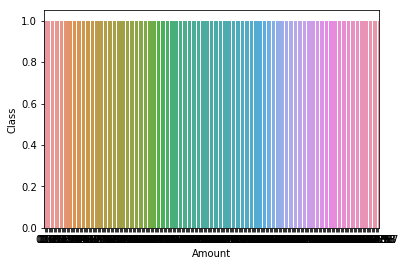

In [8]:
ax = sns.barplot(x="Amount", y="Class", data=frauds)
sns.barplot(x="Amount", y="Class", data=non_frauds)


In [0]:
ax = sns.pieplot(x="Amount", y="Class", data=frauds)
sns.pieplot(x="Amount", y="Class", data=non_frauds)


In [0]:
from scipy.special import comb
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [0]:
x = df.iloc[:, :-1]
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

In [14]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(x_train,y_train)
print('score:',logistic.score(x_test,y_test))

score: 0.9991673605328892


Overfiting?

In [17]:
y_predicted = np.array(logistic.predict(x_test))
print(y_predicted)

[0 0 0 ... 0 0 0]


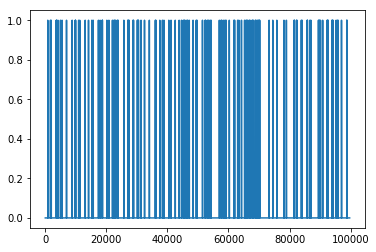

In [26]:
ax = sns.lineplot(data=y_predicted)
# sns.scatterplot(x="Amount", y="Class", data=non_frauds)